<a href="https://colab.research.google.com/github/prajwal-mv/Netflix_Movies_And_TV_Shows_Clusterig/blob/main/Netflix_Movies_and_TV_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title** :**Netflix_Movies_And_TV_Shows_Clusterig**



![alt text](https://wallpapercave.com/wp/wp5063348.jpg)

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, we are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# **Import Libraries and Data.** 

In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 117 kB/s 


In [4]:
import os
if not os.path.exists("images"):
    os.mkdir("images")

In [5]:
# Mount Drive to load data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Load the data.
netflix_data = pd.read_csv('/content/drive/MyDrive/Copy of NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# **First Look.**

In [7]:
# Fisrt 5 values.
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [8]:
# Last 5 values.
netflix_data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [9]:
# Shape of the data.
netflix_data.shape

(7787, 12)

In [10]:
# Basic info about the data.
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [11]:
# Check for null values.
for col in netflix_data.columns:
  null_rate = netflix_data[col].isnull().sum() / len(netflix_data) * 100
  if null_rate > 0:
    print(f'Percentage of null values in {col} : {null_rate}%')

Percentage of null values in director : 30.679337357133683%
Percentage of null values in cast : 9.220495697958135%
Percentage of null values in country : 6.51085141903172%
Percentage of null values in date_added : 0.1284191601386927%
Percentage of null values in rating : 0.08989341209708489%


In [12]:
# Check for duplicated entries.
netflix_data.duplicated().sum()

0

In [13]:
# Statistical info.
netflix_data.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


***Points to be noted:*** 

* There are 7787 rows and 12 columns provided in the data.
* Null values are present in director, cast, country, date_added, and rating; Since there are only few null values present in date_added and rating (10 & 7 respectively) we will remove them from the data.
* No duplicate values exist.




***Lets clean the data before we go any further.***

***First replace few null values.*** 

In [14]:
# Number of null values in date_added.
netflix_data.date_added.isnull().sum()

10

In [15]:
# Remove null values in date_added.
netflix_data.dropna(subset=['date_added'], inplace=True)

In [16]:
# Number of null values in rating.
netflix_data.rating.isnull().sum()

7

In [17]:
# Remove null values in rating.
netflix_data.dropna(subset=['rating'], inplace=True)

In [18]:
# Check the shape of our data.
netflix_data.shape

(7770, 12)

***There go the null values...***

***As for the rest of the columns containing null values, we will handle them accordingly in future analyses.***

***Second, add few more datetime features.***

In [19]:
# Create new features to store date, day, month and year seperately.
netflix_data["date_added"] = pd.to_datetime(netflix_data['date_added'])  # First convert date_added to date time format.
netflix_data['day_added'] = netflix_data['date_added'].dt.day            # Compute day.
netflix_data['year_added'] = netflix_data['date_added'].dt.year          # Compute year.
netflix_data['month_added'] = netflix_data['date_added'].dt.month        # Compute month.

***Now lets start with EDA.***

# **Exploratory Data Analysis: in Netflix Style** 


### **Content Type On Netflix:** 

([<matplotlib.patches.Wedge at 0x7f913071c710>,
 [Text(-0.9071052118424069, -0.6222219335963192, 'Movie'),
  Text(0.9895693220098982, 0.6787875639232577, 'TV Show')],
 [Text(-0.49478466100494917, -0.33939378196162856, '69.14%'),
  Text(0.5772487711724406, 0.3959594122885669, '30.86%')])

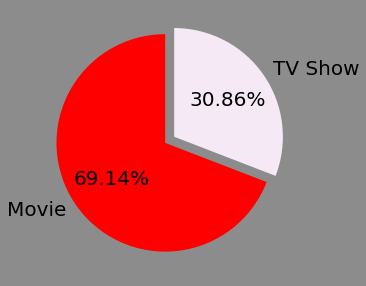

In [20]:
# Pie chart showing percentage of toal movies and TV shows.
# Choose this facecolor so as to give style of netflix
fig, ax = plt.subplots(figsize=(5,5),facecolor="#8C8C8C")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax.pie(netflix_data['type'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Movie', 'TV Show'],shadow=False,
       startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])

* Movies uploaded on Netflix are more than twice the TV Shows uploaded.
* This dose not implies that movies are more indulging that of TV Shows.
* Beacuase TV shows may have several seasons which consits of number of episodes.
* Duration of TV shows are much more that of movies.

## Number of Movies and TV Shows added on netflix.

### On Yearly Basis

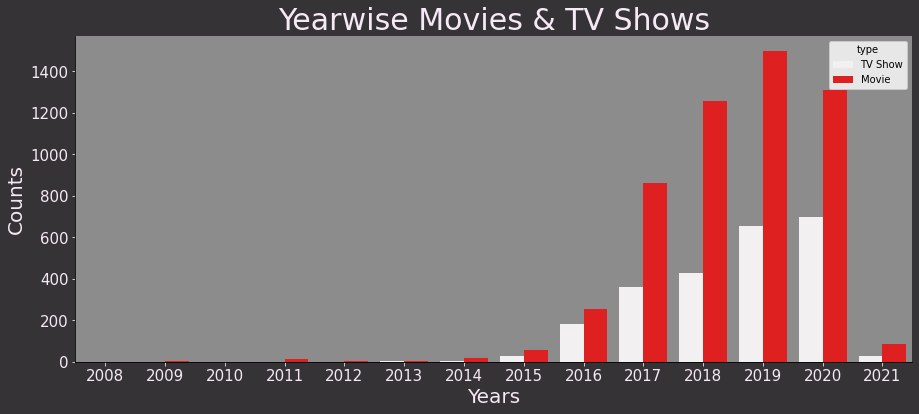

In [21]:
fig, ax = plt.subplots(figsize=(15,6),facecolor="#363336")
ax.patch.set_facecolor('#8C8C8C')
sns.countplot(x='year_added', hue='type',lw=5, color='red', data=netflix_data, ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel("Years", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Counts",  color='#F5E9F5', fontsize=20)
ax.set_title("Yearwise Movies & TV Shows", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)

* TV shows are incresing continuosly.
* Movies were incresing continuosly but after 2019 there is fall.

### On Monthly Basis

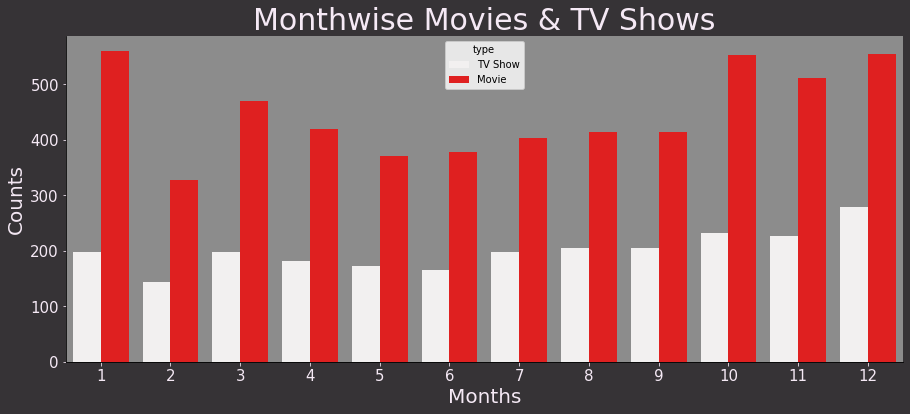

In [22]:
fig, ax = plt.subplots(figsize=(15,6),facecolor="#363336")
ax.patch.set_facecolor('#8C8C8C')
sns.countplot(x='month_added', hue='type',lw=5, color='red', data=netflix_data, ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel("Months", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Counts",  color='#F5E9F5', fontsize=20)
ax.set_title("Monthwise Movies & TV Shows", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)

* From Octomber to January, maximum number of movies and TV shows were added.
* Possible reason for that is, during this period of time events such as Christmas, New Year and several holidays takes place.

### On Daily Basis

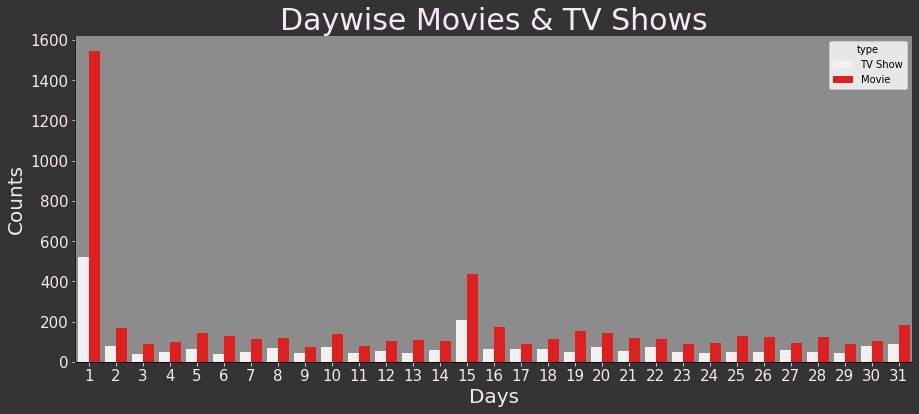

In [23]:
fig, ax = plt.subplots(figsize=(15,6),facecolor="#363336")
ax.patch.set_facecolor('#8C8C8C')
sns.countplot(x='day_added', hue='type',lw=5, color='red', data=netflix_data, ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel("Days", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Counts",  color='#F5E9F5', fontsize=20)
ax.set_title("Daywise Movies & TV Shows", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)

## Wordwide Presence of Netflix

* Popularity Netflix is all over the world.

*   List item



* Lets look for its highest presence over countries.

### Top 10 Countries having maximum Movies and TV Shows

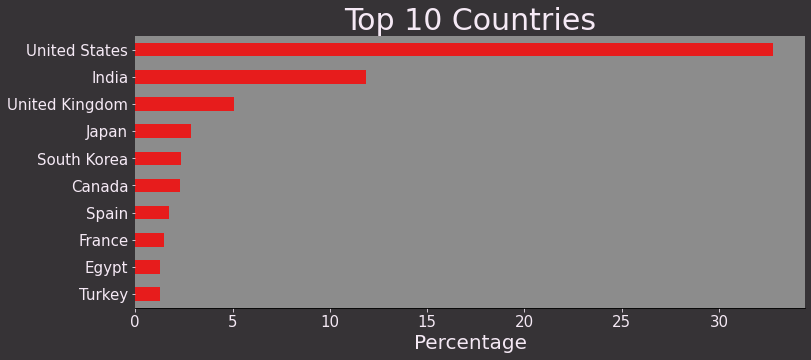

In [24]:
fig, ax = plt.subplots(figsize=(12,5),facecolor="#363336")
ax.patch.set_facecolor('#8C8C8C')
(netflix_data['country'].value_counts().sort_values()/netflix_data.shape[0]*100)[-10:].plot(kind='barh', ax=ax,color ='red',alpha=0.8)
ax.tick_params(axis= 'x', colors='#F5E9F5',labelsize=15) 
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel("Percentage", color='#F5E9F5', fontsize=20)
ax.set_title("Top 10 Countries", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

* Unites State tops the in list of maximum number of movies and TV shows.
* Followed by India, UK and Japan.

## **Release_year:**

### **We saw before in which year most of the content was added, but what about the year it released.** 

In [25]:
# Put the data into bins.
release_yr_bin = pd.cut(netflix_data.release_year, [1924, 1999, 2010, 2021])
release_yr_bin.value_counts()
release_yr_bin = pd.DataFrame(release_yr_bin.value_counts()).reset_index()
release_yr_bin.rename(columns={'index':'year_interval', 'release_year':'count'}, inplace=True)
release_yr_bin['year_interval'] = release_yr_bin['year_interval'].astype('string')
release_yr_bin

,year_interval,count
0,"(2010, 2021]",6425
1,"(1999, 2010]",896
2,"(1924, 1999]",449


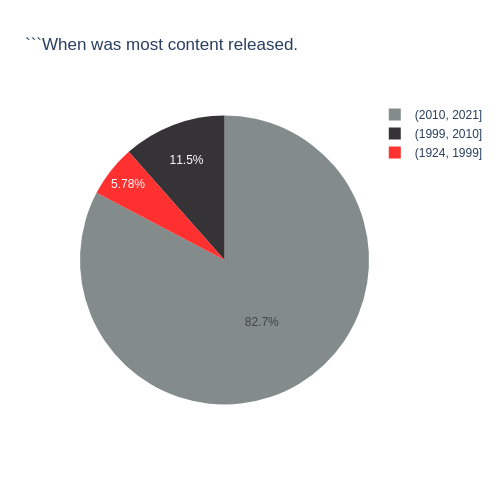

In [26]:
# Plot it.
fig = px.pie(release_yr_bin, values='count', names='year_interval', color_discrete_sequence=['#838B8B','#363336','#FF3030','#FF3030'], title='```When was most content released.',height=500, width=500)
# fig.show()
fig.show('png')

* 82% of the content available was released between 2010 and 2021.
* 17.28% of the content available was released before 2010.

## Top 10 Cast Involved either in Movies or TV Shows

In [27]:
# Create a list of all the actors in the data.
def data2list(data):
  actor_list = {}  # dict to store the count for each actor.
  temp_list = []   # list to store all the names.
  cast_list = list(data['cast'])  # define the data we intend to use.
  for i in range(len(cast_list)):
    temp_list.extend(str(cast_list[i]).split(','))
  for i in temp_list:
    if i not in actor_list:
      actor_list[i] = temp_list.count(i)
  return actor_list

In [28]:
# Create dataframe for list of actors.
actor_list = pd.DataFrame([data2list(netflix_data)]).T.reset_index()
actor_list = actor_list.sort_values(0, ascending=False).drop(106)  # dropped the nan values in the dataframe which was present at 106th index.

In [29]:
actor_list.head(10)

,index,0
1294,Anupam Kher,38
194,Takahiro Sakurai,28
2203,Om Puri,27
4039,Shah Rukh Khan,27
740,Boman Irani,25
2506,Paresh Rawal,24
8462,Andrea Libman,24
4368,Yuki Kaji,23
4994,Vincent Tong,22
2201,Akshay Kumar,22


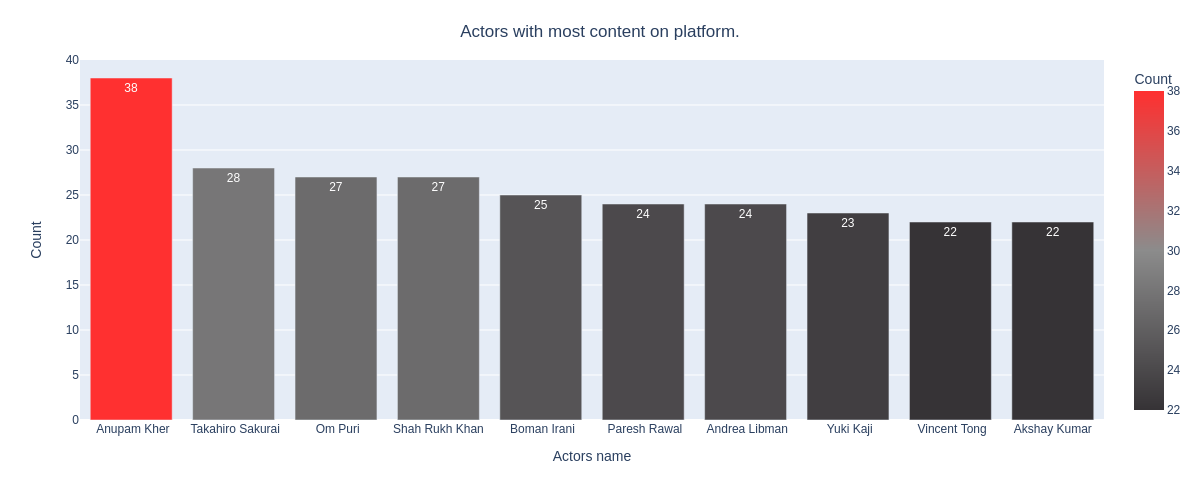

In [30]:
# Plot it.
top_10_actors = actor_list.head(10)
top_10_actors.rename(columns={'index':'Actors name', 0:'Count'}, inplace=True)

fig = px.bar(top_10_actors, x='Actors name', y='Count', text_auto=True,
             color='Count', color_continuous_scale=['#363336', '#8C8C8C','#FF3030'])

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Actors with most content on platform.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)
# fig.show()
fig.show('png')

* Anupam Kher have maximum number of movies or TV shows.
* Happy to see 6 of the actors in the top ten list of most numbers tv shows and movies are from India.

In [31]:
# Replace the null values in cast.
netflix_data['cast']=netflix_data['cast'].fillna('')

## **Director:**

**Which directors have most number of the movies and tv shows?**

In [32]:
# Replace the null values in director.
netflix_data['director']=netflix_data['director'].fillna('')

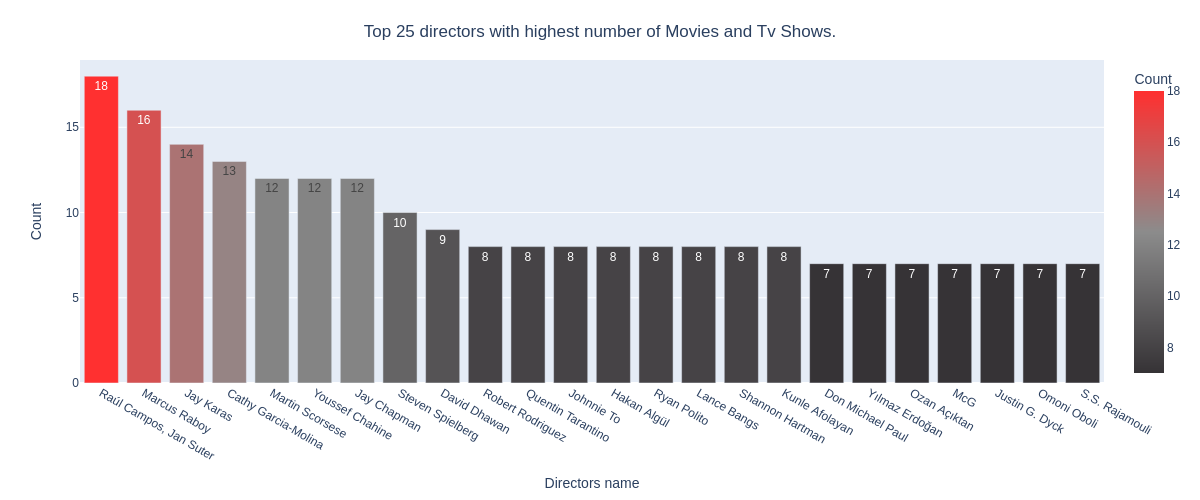

In [33]:
directors_list = netflix_data.director.value_counts().reset_index().head(25)[1:]  # We will not include the null values.
directors_list.rename(columns={'index':'Directors name', 'director':'Count'}, inplace=True)
fig = px.bar(directors_list, x='Directors name', y='Count', text_auto=True,
             color='Count', color_continuous_scale=['#363336', '#8C8C8C','#FF3030'])

fig.update_traces(textangle=0, cliponaxis=False)
fig.update_layout(
    title={
        'text': 'Top 25 directors with highest number of Movies and Tv Shows.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)
# fig.show()
fig.show('png')

* Raúl Campos, Jan Suter, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Jay Chapman are the top 5 directors which highest number of movies and tv shows.

## **Content vs Country:**

In [34]:
country_null_values = netflix_data.country.isnull().sum()
print(f'We had observed that variable country had {country_null_values} null values in it, we will replace these null values with the most occurring country which is United States.')

We had observed that variable country had 505 null values in it, we will replace these null values with the most occurring country which is United States.


In [35]:
''' Since there are many countries, we will take the top ten countries that produce
     content and see what type of content these countries provide the most?'''

netflix_data['country'].fillna('United States', inplace=True)
netflix_data['country_single'] = netflix_data['country'].apply(lambda x: x.split(",")[0])
country_order = netflix_data['country_single'].value_counts()[:10].index
countryVScontent = netflix_data[['type', 'country_single']].groupby('country_single')['type'].value_counts().unstack().loc[country_order].reset_index()
countryVScontent

type,index,Movie,TV Show
0,United States,2326.0,1053.0
1,India,883.0,73.0
2,United Kingdom,341.0,235.0
3,Canada,175.0,84.0
4,Japan,75.0,160.0
5,France,137.0,59.0
6,South Korea,42.0,152.0
7,Spain,119.0,49.0
8,Mexico,79.0,44.0
9,Australia,56.0,50.0


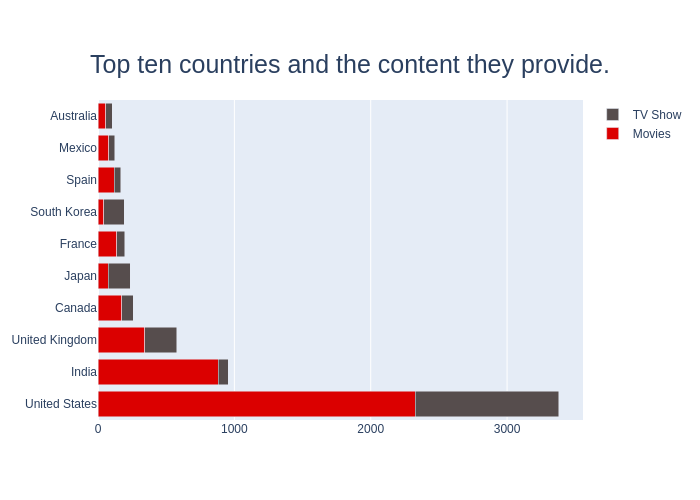

In [36]:
# Plot the above data.
fig = go.Figure()
fig.add_trace(go.Bar(
    y=countryVScontent['index'],
    x=countryVScontent['Movie'],
    name='Movies',
    orientation='h',
    marker=dict(
        color='rgba(219, 0, 0, 1)'
    )
))
fig.add_trace(go.Bar(
    y=countryVScontent['index'],
    x=countryVScontent['TV Show'],
    name='TV Show',
    orientation='h',
    marker=dict(
        color='rgba(86, 77, 77, 1)'
    )
))

fig.update_layout(barmode='stack',
                   title={'text': 'Top ten countries and the content they provide.',
                          'y':0.89,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'}
                  )
# fig.show()
fig.show('png')

* The United States is a leading producer of both types of content; this makes sense since Netflix is a US company.

* The influence of Bollywood in India explains the type of content available, and perhaps the main focus of this industry is Movies and not TV Shows.

* On the other hand, TV Shows are more frequent in South Korea, which explains the KDrama culture nowadays.


## **Duration:** 

In [37]:
# Create subsets for tv shows and movies.
tv_shows = netflix_data[netflix_data['type'] == 'TV Show']
movies = netflix_data[netflix_data['type'] == 'Movie']

# Select the durations for both.
duration_tv_shows = tv_shows['duration'].reset_index()
duration_movies = movies['duration'].reset_index()

# Remove string values from tv shows duration.
duration_tv_shows.duration = duration_tv_shows.duration.str.replace(' Season', '') \
                                                       .str.replace(' Seasons', '') \
                                                       .str.replace('s', '')                                                       
duration_tv_shows.duration = duration_tv_shows.duration.astype(str).astype(int)

# Remove string values from movie duration.
duration_movies.duration = duration_movies.duration.str.replace(' min', '')                                                       
duration_movies.duration = duration_movies.duration.astype(str).astype(int)

**TV Shows**

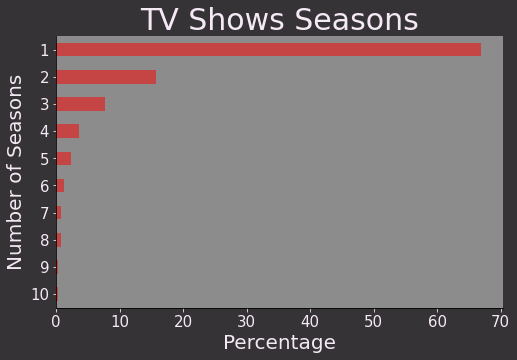

In [38]:
fig, ax = plt.subplots(figsize=(8,5),facecolor="#363336")
ax.patch.set_facecolor('#8C8C8C')
(duration_tv_shows['duration'].value_counts().sort_values()/duration_tv_shows.shape[0]*100)[-10:].plot(kind='barh', ax=ax,color ='red',alpha=0.5)
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel("Percentage", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Number of Seasons", color='#F5E9F5', fontsize=20)
ax.set_title("TV Shows Seasons", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)


* Almost 68% of TV shows consist of single season only.
* Most of the Tv Shows last for 1 or 2 seasons, it is rare for a show to have more than 5 seasons.

**Movies**

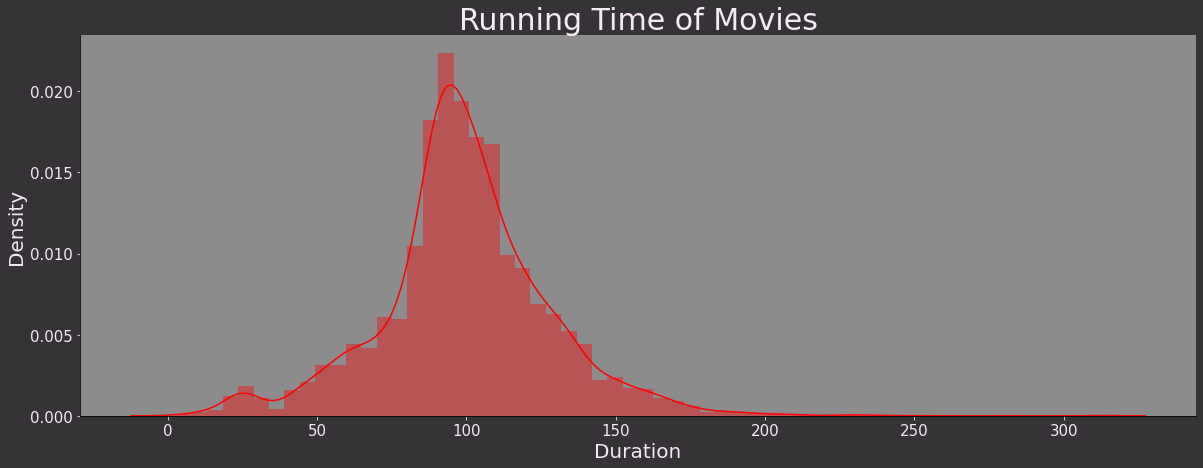

In [39]:
fig, ax = plt.subplots(figsize=(20,7),facecolor="#363336")
ax.patch.set_facecolor('#8C8C8C')
sns.distplot(duration_movies['duration'], hist=True, bins=60,color='red', ax=ax)
ax.tick_params(axis= 'x', colors='#F5E9F5',labelsize=15) 
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel("Duration", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Density", color='#F5E9F5', fontsize=20)
ax.set_title("Running Time of Movies", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)

* Most of the Tv Shows last for 1 or 2 seasons, it is rare for a show to have more than 5 seasons.
* Most of the movies last for 90 to 120 minutes.

## Ratings on Movies and TV Shows

**For Movies:**
* G: Kids
* PG: Older Kids (7+)
* PG-13: Teens (13+)
* NC-17, NR, R, Unrated: Adults (18+)


**For TV Shows:**
* TV-G, TV-Y: Kids
* TV-Y7/FV/PG: Older Kids (7+)
* TV-14: Young Adults (16+)
* TV-MA: Adults (18+)


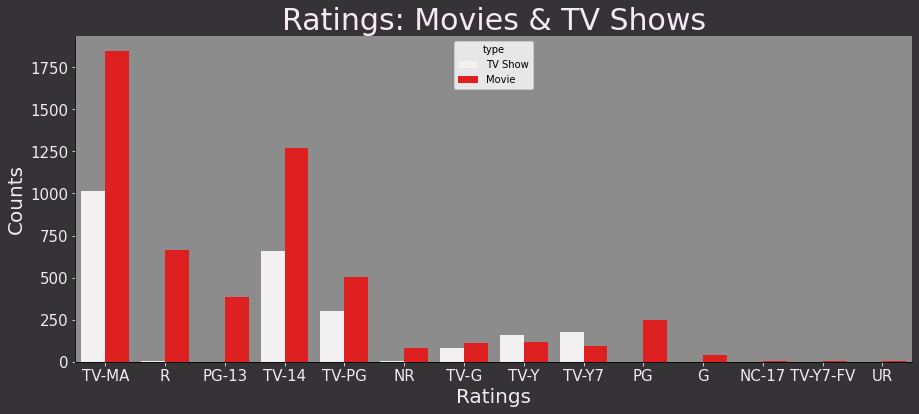

In [40]:
fig, ax = plt.subplots(figsize=(15,6),facecolor="#363336")
ax.patch.set_facecolor('#8C8C8C')
sns.countplot(x='rating', hue='type',lw=5, color='red', data=netflix_data, ax=ax)
ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
ax.set_xlabel("Ratings", color='#F5E9F5', fontsize=20)
ax.set_ylabel("Counts",  color='#F5E9F5', fontsize=20)
ax.set_title("Ratings: Movies & TV Shows", color='#F5E9F5', fontsize=30)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)


* TV-MA tops the charts, indicating that mature content is more popular on Netflix.
* This popularity is followed by TV-14 and TV-PG, which are Shows focused on Teens and Older kids.
* Very few titles with a rating NC-17 exist. It can be understood since this type of content is purely for the audience above 17.

## Originally Uploaded on Netflix

* Some movies and TV shows were actually released in the past and they were added later on Netflix. 
* But some movies and TV shows were released on Netflix itself. Named those as Netflix Originals.





* **Originals** : For which released year and added year is same.

### Originals in Movies

* Creating new feature as originals having values Yes and No.

In [41]:
movies['originals'] = np.where(movies['release_year']==movies['year_added'], 'Yes', 'No')

([<matplotlib.patches.Wedge at 0x7f912ea02e50>,
 [Text(-0.8900699117813855, -0.6463555926434588, 'Others'),
  Text(0.9709853583069661, 0.7051151919746822, 'Originals')],
 [Text(-0.48549267915348293, -0.3525575959873411, '69.99%'),
  Text(0.5664081256790635, 0.4113171953185646, '30.01%')])

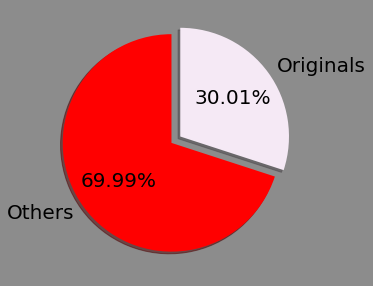

In [42]:
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5,5),facecolor="#8C8C8C")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax.pie(movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])

* 30% movies released on Netflix.
* 70% movies added on Netflix were released earlier by different mode. 
* May be after buying rights of old released movies and then adding all the movies on Netflix.

### Originals in TV Shows

In [43]:
tv_shows['originals'] = np.where(tv_shows['release_year']==tv_shows['year_added'], 'Yes', 'No')

([<matplotlib.patches.Wedge at 0x7f912e9924d0>,
 [Text(-1.099864069418109, -0.017292449307057294, 'Others'),
  Text(1.1998517120924825, 0.01886449015315273, 'Originals')],
 [Text(-0.5999258560462413, -0.009432245076576704, '50.50%'),
  Text(0.6999134987206148, 0.011004285922672425, '49.50%')])

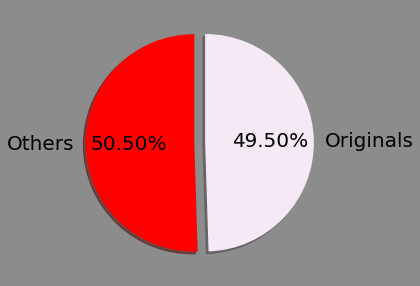

In [44]:
# pie plot showing percentage of originals and others in movies 
fig, ax = plt.subplots(figsize=(5,5),facecolor="#8C8C8C")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax.pie(tv_shows['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])

* Almost 50-50
* 50% TV shows originaly from Netflix whereas remaining 50% were added after released on different mode.

## **Title:**

### **We will create a wordcloud to see which words appear the most in the titles for movies and tv shows.**

<Figure size 864x576 with 0 Axes>

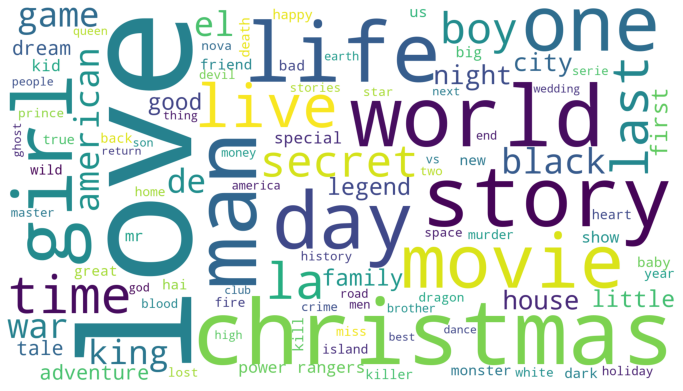

In [45]:
from wordcloud import WordCloud, ImageColorGenerator
plt.figure(figsize=(12,8))
text = ' '.join(str(n).lower() for n in netflix_data.title)
#Generate wordcloud image
wordcloud = WordCloud(max_words=100, background_color = 'white',width = 1920, height = 1080).generate(text)
plt.figure(figsize=(12,8))
#Display the image
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* Most repeated words in title include **Christmas, Love, World, Man, and Story.**
* We saw that most of the **movies and tv shows** got added during the **winters**, which tells why **Christmas** appeared many times in the **titles**.

## **Description:**

### **Similarly creating wordcloud for description to see which words appear the most.**

<Figure size 864x576 with 0 Axes>

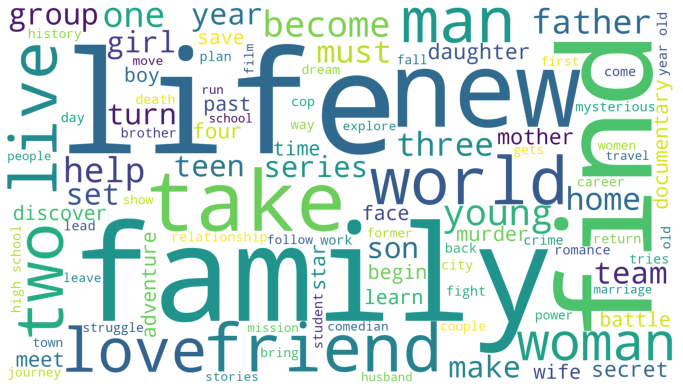

In [46]:
from wordcloud import WordCloud, ImageColorGenerator
plt.figure(figsize=(12,8))
text = ' '.join(str(n).lower() for n in netflix_data.description)
#Generate wordcloud image
wordcloud = WordCloud(max_words=100, background_color = 'white',width = 1920, height = 1080).generate(text)
plt.figure(figsize=(12,8))
#Display the image
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

* Most occurring words in the description of the tv shows and movies are **World,Find,Family, Friend, Love, Life, Woman, Man.**

# **Data PreProcessing:**

### **We will be using text columns to create clusters for our data.**

In [47]:
cluster_df = netflix_data[['title']]
cluster_df['cluster_data'] = (netflix_data['description'] + ' ' + netflix_data['listed_in'] + ' ' + netflix_data['director'] + ' ' + netflix_data['cast'] + ' ' + netflix_data['country'] + ' ' + netflix_data['rating']).astype(str)
cluster_df.set_index('title', inplace = True)
cluster_df.head()
cluster_df.head()

,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...
23:59,"When an army recruit is found dead, his fellow..."
9,"In a postapocalyptic world, rag-doll robots hi..."
21,A brilliant group of students become card-coun...


In [48]:
# Remove punctuation from the text.
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
    
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)
cluster_df.head(2)

,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...


In [49]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [50]:
stop_words = set(stopwords.words('english'))

In [51]:
# Remove the stopwords.
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stopwords)
cluster_df.cluster_data.head(2)

title
3%      future elite inhabit island paradise far crowd...
7:19    devastating earthquake hits mexico city trappe...
Name: cluster_data, dtype: object

In [53]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [54]:
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stemming)
cluster_df.head(2)

,cluster_data
title,
3%,futur elit inhabit island paradis far crowd sl...
7:19,devast earthquak hit mexico citi trap survivor...


# **Creating Clusters:** 

**Vectorizing the text data using TF_IDF Vectorizer.**

In [56]:
bag_of_words = cluster_df.cluster_data

In [57]:
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(bag_of_words)

In [58]:
t_vectorizer.get_feature_names_out()

array(['007', '10', '100', ..., 'ştar', 'şçil', 'şükrü'], dtype=object)

### **Lets perform Dimensionality Reduction using PCA:** 

In [59]:
pca = PCA()
pca.fit(X.toarray())

PCA()

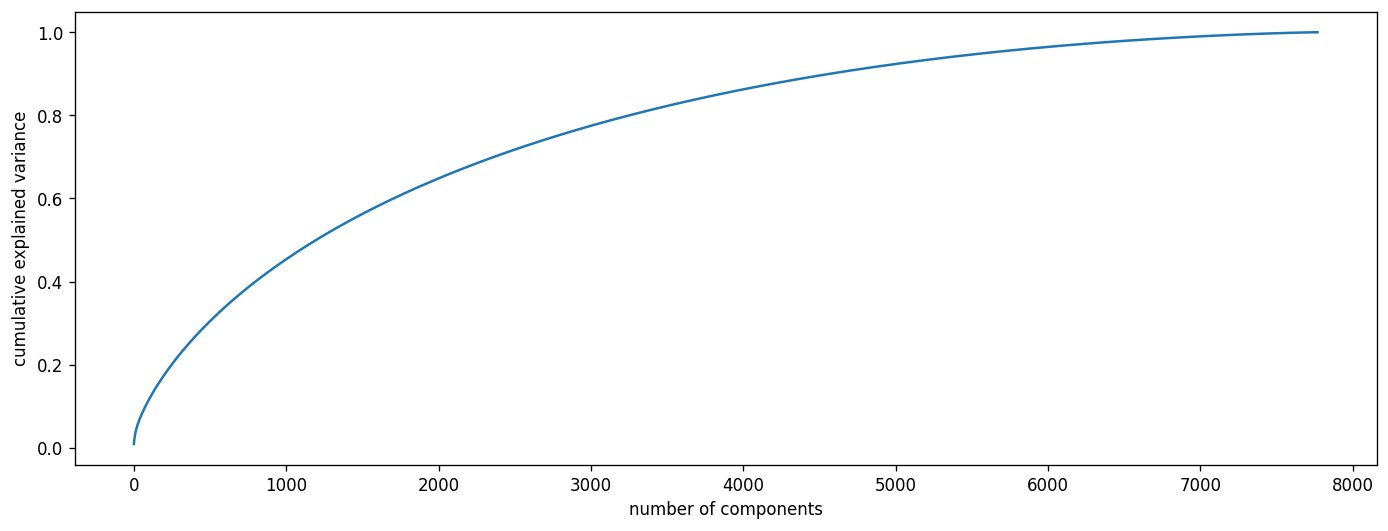

In [60]:
# Lets plot explained var v/s comp to check how many components to be considered.
plt.figure(figsize=(14,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

* **We can see from the above plot almost 95% of the variance can be explained by 5000 components.**
* **Since choosing 5000 could be tricky we will set the value to be 95% in sklearn.**

In [61]:
pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X.toarray())
X_transformed = pca_tuned.transform(X.toarray())
X_transformed.shape

(7770, 5591)

In [62]:
X_transformed

array([[ 0.12381384,  0.01878768, -0.01985089, ..., -0.01290126,
        -0.0061675 ,  0.00134415],
       [-0.03957416,  0.03685093, -0.00068804, ...,  0.01741727,
        -0.00170697,  0.00722743],
       [-0.04426074,  0.04240966, -0.03652511, ...,  0.00155654,
         0.00456558, -0.00629564],
       ...,
       [-0.08081921, -0.0809065 ,  0.27382203, ...,  0.00364216,
        -0.00489299,  0.01251322],
       [ 0.10148378, -0.00405508,  0.01560673, ..., -0.00551716,
        -0.01236381,  0.01055393],
       [-0.09251356, -0.20593119,  0.35063681, ..., -0.00786756,
         0.00438817,  0.00044112]])